<a href="https://colab.research.google.com/github/MaxtronElNoob/MaxtronElNoob/blob/main/Taller1_INF280_I_2022_Los_NFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1





<table align='left'>
<tr>
<td><img src='https://www.hydro.com/globalassets/08-about-hydro/hydro-worldwide/netherlands/pp-tulips.jpg' width='900'/> </td>
</tr>
</table>


## Objetivos de aprendizaje
Al final de este taller el/la alumno/a sabrá:

> * Distinguir las funciones de las principales librerías en Python para el manejo y análisis exploratorio de datos.
> * Aplicar técnicas de visualización para generar gráficos que le permitan llegar a conclusiones descriptivas acerca de una muestra.
> * Obtener estadísticas de tendencia y dispersión univariadas sobre las variables presentes en la muestra.
> * Aplicar transformaciones sobre conjuntos de datos que le permitan, posteriormente, preparár los datos de la muestra para realizar un proceso de modelamiento.



## Datos

En este taller se utilizará el dataset `Energy consumption of the Netherlands`, disponible libremente en [Kaggle](https://www.kaggle.com/lucabasa/dutch-energy). Este dataset contiene información histórica sobre la red de energía, manejada por distintas compañías en los Paises Bajos para distintas áreas agregadas por el código postal. Vale la pena notar que, como se indica en la página del dataset, el mercado es no competitivo, es decir, solo una compañía es la encargada de entregar servicios a un determinado sector (descrito por el código postal), lo que implica que no hay fuga de clientes de una compañía a otra a través de los años.

En la carpeta entregada para este taller se muestran dos sub-carpetas:

> - **Electricity:** Contiene varios archivos en formato csv con un nombre que sigue la sintáxis:`<nombreEmpresa>_electricity_<año>.csv`, donde `nombreEmpresa` es el nombre de la empresa proveedora de electricidad.


> - **Gas:** Contiene varios archivos en formato csv con un nombre que sigue la sintáxis:`<nombreEmpresa>_gas_<año>.csv`, donde `nombreEmpresa` es el nombre de la empresa proveedora de gas.

Con respecto a las variables medidas, se debe notar que slgunas empresas proveedoras miden algunas características adicionales, para efectos de este estudio se le sugiere conservar las variables comunes a todas las empresas:

- `net_manager`: Código del administrador regional de la red o nombre del mismo.
- `purchase_area`: Código del área de donde es comprada la energía.
- `street`: Nombre de la calle de las viviendas registradas.
- `zipcode_from`: Código postal _"inicial"_ que define la zona (junto con `zipcode_to`) resumida en el registro.
- `zipcode_to`: Código postal _"final"_ que define la zona (junto con `zipcode_from`) resumida en el registro.
- `city`: Ciudad de las viviendas.
- `num_connections`: Número de conexiones en el rango de los códigos postales.
- `delivery_perc`: Porcentaje del consumo neto de electricidad o gas. Mientras más bajo significa que hubo mayor retorno de energía a la red, por ejemplo, mediante paneles solares.
- `perc_of_active_connections`: Procentaje de conexiones activas en el rango definido por los códigos postales.
- `type_conn_perc`: Porcentaje del principal tipo de conexión en el rango definido por los códigos potales, es decir, es el porcentaje del que corresponde el tipo de conexión que es moda dentro del espacio muestreado, con respecto a todos los tipos de conexiones de esa misma zona.
- `type_of_connection`: Principal tipo de conexión en la zona definida por los rangos de código postal.
- `annual_consume`: Consumo anual extraído de la red, en $kW/h$ (kilowatt por hora) para electricitdad y $m^3$ para gas.



In [ ]:
!wget www.inf.utfsm.cl/~jnancu/netherlands-energy.zip 
!unzip netherlands-energy.zip 

URL transformed to HTTPS due to an HSTS policy
--2022-03-31 09:24:45--  https://www.inf.utfsm.cl/~jnancu/netherlands-energy.zip
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144860623 (138M) [application/zip]
Saving to: ‘netherlands-energy.zip.2’

netherlands-energy. 100%[===================>] 138.15M  22.0MB/s    in 7.2s    

2022-03-31 09:24:53 (19.3 MB/s) - ‘netherlands-energy.zip.2’ saved [144860623/144860623]

Archive:  netherlands-energy.zip
replace netherlands-energy/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
BASE_DATA_PATH = 'netherlands-energy' 

In [ ]:
!ls 'netherlands-energy' 

'Electricity Corrected'  'Gas Corrected'


Como ayuda, el código de más abajo carga todos los archivos csv en un único dataframe conservando la información del año.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from glob import glob
import re

plt.rcParams['figure.figsize'] = (15,10)

selected_cols = ["net_manager" ,"purchase_area", "street", "zipcode_from", "zipcode_to", "city", "num_connections", "delivery_perc", "perc_of_active_connections",
                 "type_conn_perc", "type_of_connection", "annual_consume", "year"]
                 
# Si no han tenido mucha experiencia con comprensiones de lista probablemente l@s alumn@s opten por ciclos simples

# Electricity
list_dfs_electricity = []
for file_path in glob(f'{BASE_DATA_PATH}/Electricity Corrected/*.csv'):
  yr = file_path.split('_')[-1].split('.')[0]
  if '0101' in yr:
    yr = yr.replace('0101', '')
  this_df = pd.read_csv(file_path)
  this_df['year'] = int(yr)
  list_dfs_electricity.append(this_df)

df_electricity = pd.concat(list_dfs_electricity)
df_electricity = df_electricity[selected_cols]

# Gas
list_dfs_gas = []
for file_path in glob(f'{BASE_DATA_PATH}/Gas Corrected/*.csv'):
  yr = file_path.split('_')[-1].split('.')[0]
  if '0101' in yr:
    yr = yr.replace('0101', '')
  this_df = pd.read_csv(file_path)
  this_df['year'] = int(yr)
  list_dfs_gas.append(this_df)

df_gas = pd.concat(list_dfs_gas)
df_gas = df_gas[selected_cols]


In [ ]:
df_electricity['net_annual_cons'] = df_electricity['annual_consume'] * df_electricity['delivery_perc'] / 100
df_electricity['self_production'] = df_electricity['annual_consume'] - df_electricity['net_annual_cons']
df_gas['net_annual_cons'] = df_gas['annual_consume'] * df_gas['delivery_perc'] / 100
df_gas['self_production'] = df_gas['annual_consume'] - df_gas['net_annual_cons']

df_electricity['consume_per_conn'] = df_electricity['annual_consume'] / (df_electricity['num_connections'] * df_electricity['perc_of_active_connections'] / 100)
df_electricity.loc[df_electricity['consume_per_conn'] == np.inf, 'consume_per_conn'] = 0
df_gas['consume_per_conn'] = df_gas['annual_consume'] / (df_gas['num_connections'] * df_gas['perc_of_active_connections'] / 100)
df_gas.loc[df_gas['consume_per_conn'] == np.inf, 'consume_per_conn'] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Crearemos dos variables interesantes para análisis:

*   `self_production`: cantidad de energía autoproducida por los hogares (a través por ejemplo de paneles solares).
*   `consume_per_conn`: consumo medio de energía por conexión en una determinada zona.



## Problema de Estudio
Usted trabaja entregando servicios de consultoría y su actual cliente resulta ser una firma de inversionistas quienes están interesados en evaluar el desempeño del mercado de la energía eléctrica y de gas en los Países Bajos. La firma de inversionistas debe decidir si realizar una inversión y requiere por lo tanto conocer el estado del mercado de la energía en este país. Le encargan a usted la tarea de estudiarlo a partir de la muestra entregada en la sección anterior.

Para efectos de este estudio escoja un tipo de energía a estudiar y responda a las inquietudes de los clientes. Específicamente su cliente necesita alcarar al menos los siguientes puntos:




## Requerimientos del cliente (10 pts. c/u)

1.  ¿Cuáles son las 10 ciudades que consumieron más energía eléctrica el 2020? ¿Son las mismas 10 que consumieron una mayor cantidad anual de gas? Entregue estadísticas y un gráfico apropiado para apoyar su respuesta. ¿Tiene sentido lo que observa?

2.  ¿Cuál es el grado de acaparamiento que se observa en el mercado eléctrico nacional durante 2020? ¿En el mercado del gas? Responda analizando el número de conexiones por proveedor y la energía consumida por esas conexiones. Entregue medidas de tendencia y un gráfico apropiado para apoyar su respuesta.

3. ¿Cuánta energía consumió una conexión a la red durante 2020? Responda construyendo un histograma que muestre cómo se distribuye la cantidad de energía por conexión durante 2020. Describa el histograma en términos de modas, simetría, y sesgo. Entregue además estadísticas de tendencia y dispersión. Comente.

4. Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare el consumo por conexión de esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo inusualmente pequeño o inusualmente grande por conexión?

5. ¿Cuánta energía auto-generaron los hogares durante 2020? Responda construyendo y describiendo un gráfico que muestre cómo se distribuye la cantidad de energía total consumida por los hogares durante 2020, la cantidad de energía autogenerada ese año, y la fracción de la energía consumida que es autogenerada por los hogares. Comente. 

6. Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare la distribución de la cantidad de energía auto-generada en esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo auto-generado inusualmente pequeño o inusualmente grande?

7. ¿Existe una relación entre el consumo anual y la cantidad de conexiones de una ciudad? ¿Entre el consumo anual y la cantidad de energía auto-generada en la ciudad? 

8. ¿Está aumentado el consumo de gas en el país? ¿El consumo de electricidad? ¿Está aumentando o disminuyendo más un tipo de consumo que otro? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones. Comente lo que observa.

9. ¿Está aumentado la cantidad de energía auto-generada en el país? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones.  Comente lo que observa.


10. Proponga y desarrolle un análisis libre que no haya sido cubierto y que esté relacionada al objetivo del cliente (saber en qué empresas o ciudades o tipos de conexion invertir). Resuma también las principales conclusiones del estudio.


## Consejos y tips para su desarrollo
- Familiaricese con los tipos de datos que implementa pandas.
- Probablemente le sirva familiarizarse con las formas de hacer filtros según condiciones booleanas en pandas.
- La columna `type_conn_perc` presenta un pequeño problema: El punto flotante está especificado con una coma (`,`) en lugar de un punto (`.`), esto hace que pandas interprete los valores de esa columna como `object` cuando en realidad debiesen estar como tipo `float`, estudie como coercionar una columna en pandas de un tipo de dato a otro y somo aplicar transformaciones sobre cada uno de los elementos dentro de una columna (método `.apply()` por ejemplo).
- Puede agrupar datos de acuerdo a alguna columna de interés y después aplicar alguna función de agregación sobre alguna/s columna/s de interés con los métodos `.groupby()` y `.agg()` de la clase `DataFrame` y `GroupedDataFrame` respectivamente. Por ejemplo, si quisiese saber la cantidad de conexiones por ciudad podría agrupar por ciudad y agregar la columna `num_connections` con una operación de suma.
- Algunas funciones de visualización de la librería `seaborn` permiten la desagregación de los gráficos de acuerdo alguna variable categórica (idealmente) mediante la incorporación del parámetro `hue` en su firma, vea la documentación del método para saber como usarlo en caso de que lo requiera.




## Formalidades & Reglas


*   **Fecha límite:** la recopilación de las soluciones para corrección se hará el día martes 29 de Marzo a las 08:00 hrs. 
 
*   La solución debe desarrollarse como extensión del cuaderno con los enunciados, cambiando el nombre del archivo a *Taller1_INF280_I_2022_ENTREGA_NOMBRE_EQUIPO.ipynb*.

*  Se debe trabajar en equipos de 3 personas identificadas al inicio del cuaderno con la solución. Excepciones a esta regla deben ser conversadas con los profesores.

*  Pueden utilizar Python o R. Pueden re-usar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente.

*  Es posible utilizar apuntes, libros, y cualquier otro material que desee, pero debe ser el equipo quien desarrolle los ejercicios y comente los resultados en el cuaderno que entregará.

*  Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado.

*  Además del cuaderno, cada estudiante debe entregar un video (<=20 minutos) explicando lo que se hizo. Mientras se da la explicación, se debe recorrer el cuaderno con la solución enfatizando el análisis y las conclusiones (no detalles de código). Los videos debe ser subidos a una plataforma externa (Youtube, Google Drive, Dropbox, etc). Se deben sólo incluir links dentro del cuaderno, recordando otorgar los permisos para que se pueda revisar.



# **Desarrollo**

Este trabajo fue desarrollado por los autores aquí identificados en conformidad con el código de honor UTFSM.

# Links

En esta sección se encuentran los enlaces al video de cada integrante:

*   Alonso Herrera: [https://drive.google.com/file/d/1nO41rSlPXkXgVTOKi3yrZW55pUR6WbGB/view?usp=sharing](https://drive.google.com/file/d/1nO41rSlPXkXgVTOKi3yrZW55pUR6WbGB/view?usp=sharing)
*   Nicolás Pizarro: https://youtu.be/dOlrCmKmXg8
*   Francisca González: [https://drive.google.com/file/d/1xYn91i3yZ8IE2Mt7bFj7dChGtEgHJXg5/view?usp=sharing](https://drive.google.com/file/d/1xYn91i3yZ8IE2Mt7bFj7dChGtEgHJXg5/view?usp=sharing)



# Pregunta 1

¿Cuáles son las 10 ciudades que consumieron más energía eléctrica el 2020? ¿Son las mismas 10 que consumieron una mayor cantidad anual de gas? Entregue estadísticas y un gráfico apropiado para apoyar su respuesta. ¿Tiene sentido lo que observa?

Lo primero que hicimos para resolver esta pregunta fue crear 2 dataframes, uno para cada tipo de energía, y que solamente posee datos del año 2020.

In [ ]:
df_2020_e = df_electricity.loc[df_electricity['year'] == 2020]
df_2020_g = df_gas.loc[df_gas['year'] == 2020]

Luego sumamos el consumo anual en cada ciudad, los ordenamos descendentemente y graficamos las primeras 10 ciudades con mayor consumo de electricidad y gas, cuyos resultados se presentan a continuación.

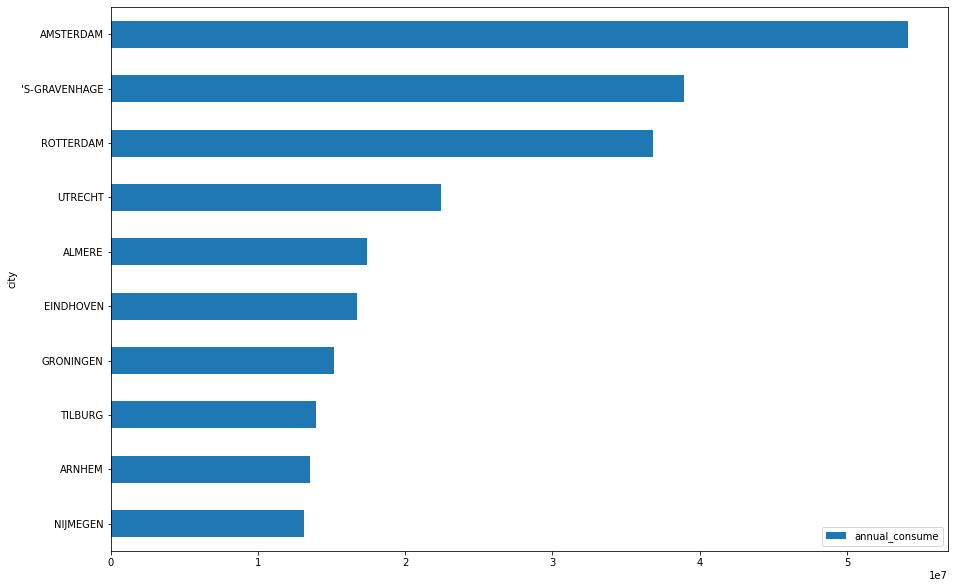

In [ ]:
df_2020_e.groupby(['city']).sum().sort_values('annual_consume',ascending=True)['annual_consume'].tail(10).plot(kind='barh',legend='Reverse')
plt.show()

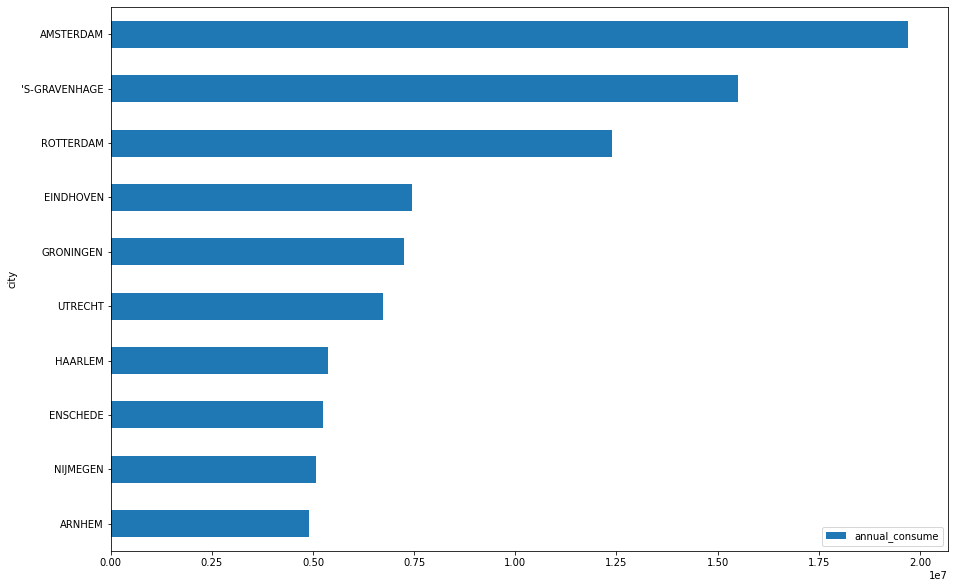

In [ ]:
df_2020_g.groupby(['city']).sum().sort_values('annual_consume',ascending=True)['annual_consume'].tail(10).plot(kind='barh',legend='Reverse')
plt.show()

De los gráficos anteriores se puede observar que algunas ciudades comparten posición tales como Amsterdam, 'S-Gravenhage y Rotterdam, siendo las 3 primeras en ambas gráficas, sin embargo se presentan ciudades en el gráfico de electricidad que no aparecen en el gráfico de gas y viceversa.

Esto quiere decir que existen ciudades con un alto consumo de electricidad y un bajo consumo de gas, otras con un alto consumo de gas y un bajo consumo de electricidad, y otras con un alto consumo tanto de electricidad como de gas.

# Pregunta 2

¿Cuál es el grado de acaparamiento que se observa en el mercado eléctrico nacional durante 2020? ¿En el mercado del gas? Responda analizando el número de conexiones por proveedor y la energía consumida por esas conexiones. Entregue medidas de tendencia y un gráfico apropiado para apoyar su respuesta.

Primero obtuvimos el número de conexiones en el año 2020, las graficamos en un gráfico de barras y obtuvimos sus medidas de tendencia (media, mediana y moda).

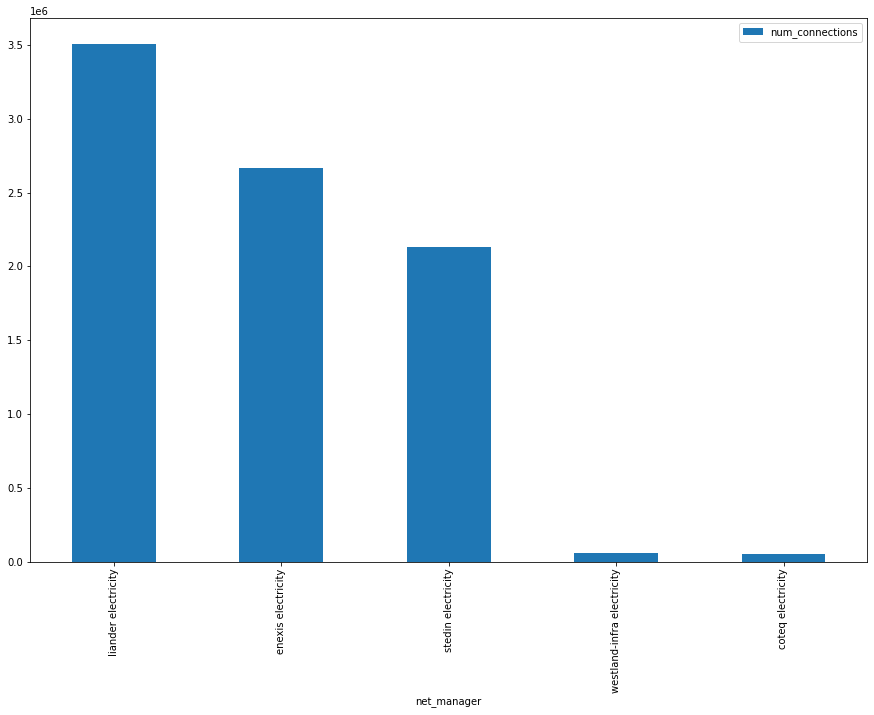


Medidas de Tendencia en num_connections:
Media:  23
Mediana:  20
Moda:  16


In [ ]:
df_2020_e.groupby(['net_manager']).sum().sort_values('num_connections',ascending=False)['num_connections'].plot(kind='bar',legend='Reverse')
plt.show()

print('\nMedidas de Tendencia en num_connections:')
print('Media: ', int(df_2020_e['num_connections'].mean()))
print('Mediana: ', int(df_2020_e['num_connections'].median()))
print('Moda: ', int(df_2020_e['num_connections'].mode().values))

Luego repetimos el procedimiento para los consumos por conexiones.

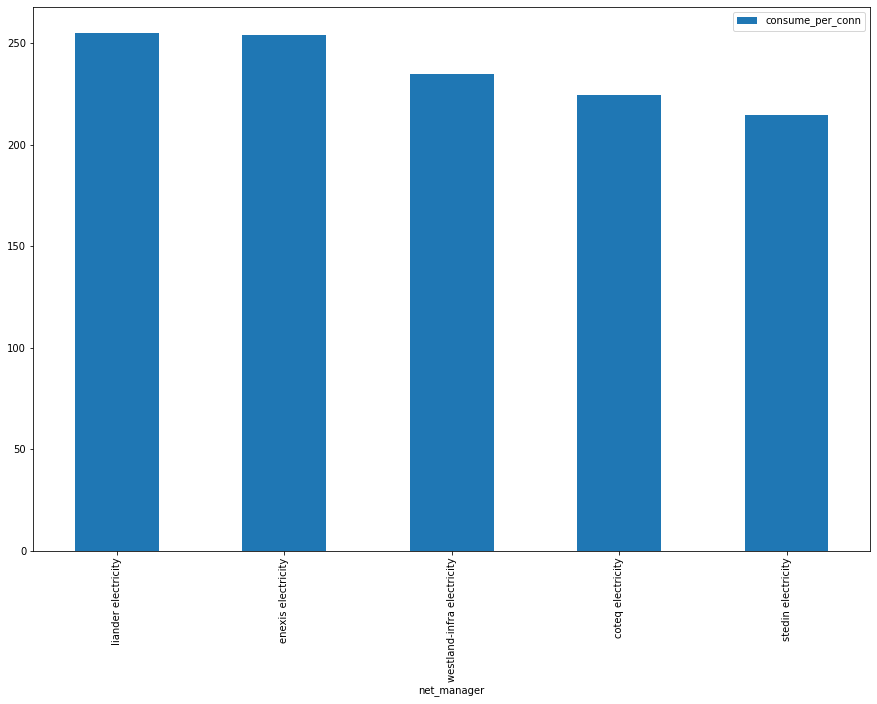


Medidas de Tendencia en consume_per_conn:
Media:  244
Mediana:  162
Moda:  0


In [ ]:
df_2020_e.groupby(['net_manager']).mean().sort_values('consume_per_conn',ascending=False)['consume_per_conn'].plot(kind='bar',legend='Reverse')
plt.show()

print('\nMedidas de Tendencia en consume_per_conn:')
print('Media: ', int(df_2020_e['consume_per_conn'].mean()))
print('Mediana: ', int(df_2020_e['consume_per_conn'].median()))
print('Moda: ', int(df_2020_e['consume_per_conn'].mode().values))

Finalmente creamos un dataframe nuevo con `net_manager`, `num_connections`, `consume_per_conn`, junto con `num_connections_percent`, que es porcentaje de número de conexiones que pertenecen a una compañía.

In [ ]:
a = df_2020_e.groupby(['net_manager']).sum()
df_manager = pd.DataFrame()
net_managers = []
for index,row in a.iterrows():
  net_managers.append(index)
df_manager['net_manager'] = net_managers
df_manager['num_connections'] = a['num_connections'].values

list_consume = []

consume_means = pd.DataFrame(df_2020_e.groupby(['net_manager'])['consume_per_conn'].mean())
consume_means['net_manager'] = consume_means.index
for manager in net_managers:
  list_consume.append(float(consume_means.loc[consume_means['net_manager'] == manager]['consume_per_conn'].values))

df_manager['consume_per_conn'] = list_consume

df_manager['total_consume'] = df_manager['num_connections'] * df_manager['consume_per_conn']

df_manager['total_consume_perc'] =  100 * df_manager['total_consume'] / df_manager['total_consume'].sum()

df_manager

,net_manager,num_connections,consume_per_conn,total_consume,total_consume_perc
0,coteq electricity,55307.0,224.757667,1.243067e+07,0.604335
1,enexis electricity,2666499.0,254.282387,6.780437e+08,32.964066
2,liander electricity,3505527.0,255.130042,8.943653e+08,43.480846
3,stedin electricity,2133441.0,214.624236,4.578881e+08,22.260887
4,westland-infra electricity,60419.0,234.859563,1.418998e+07,0.689866


Con el mercado del gas hicimos los mismos cálculos y gráficos con los datos del año 2020.

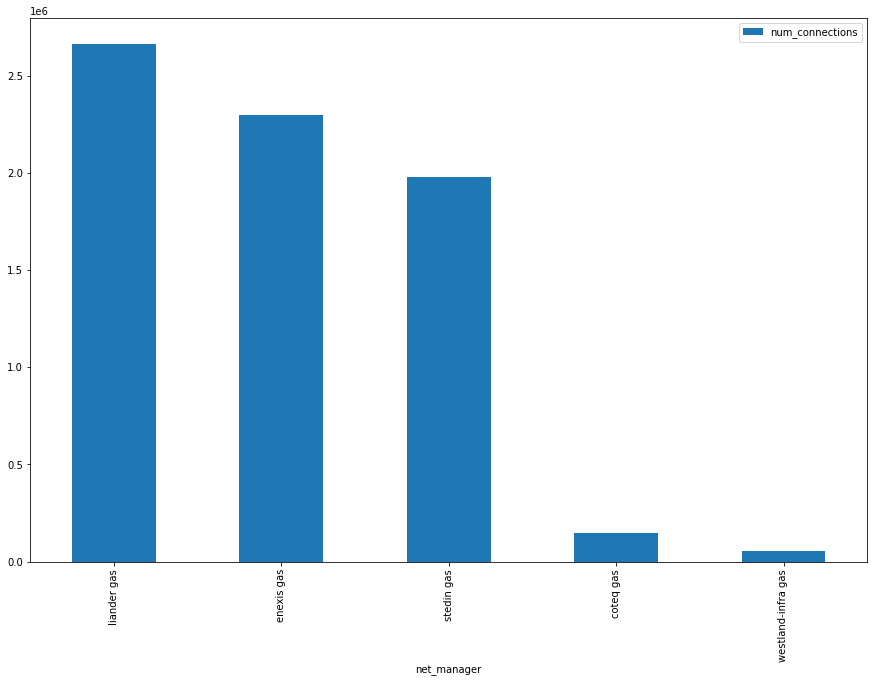


Medidas de Tendencia en num_connections:
Media:  21
Mediana:  19
Moda:  16


In [ ]:
df_2020_g.groupby(['net_manager']).sum().sort_values('num_connections',ascending=False)['num_connections'].plot(kind='bar',legend='Reverse')
plt.show()

print('\nMedidas de Tendencia en num_connections:')
print('Media: ', int(df_2020_g['num_connections'].mean()))
print('Mediana: ', int(df_2020_g['num_connections'].median()))
print('Moda: ', int(df_2020_g['num_connections'].mode().values))

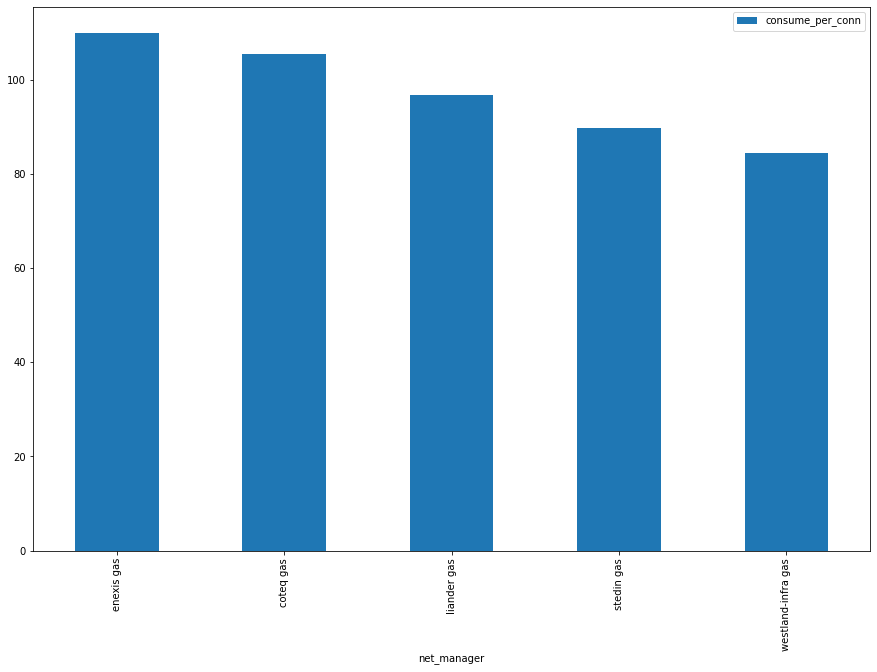


Medidas de Tendencia en consume_per_conn:
Media:  99
Mediana:  79
Moda:  0


In [ ]:
df_2020_g.groupby(['net_manager']).mean().sort_values('consume_per_conn',ascending=False)['consume_per_conn'].plot(kind='bar',legend='Reverse')
plt.show()

print('\nMedidas de Tendencia en consume_per_conn:')
print('Media: ', int(df_2020_g['consume_per_conn'].mean()))
print('Mediana: ', int(df_2020_g['consume_per_conn'].median()))
print('Moda: ', int(df_2020_g['consume_per_conn'].mode().values))

In [ ]:
a = df_2020_g.groupby(['net_manager']).sum()
df_manager = pd.DataFrame()
net_managers=[]
for index,row in a.iterrows():
  net_managers.append(index)
df_manager['net_manager'] = net_managers
df_manager['num_connections'] = a['num_connections'].values

list_consume = []

consume_means = pd.DataFrame(df_2020_g.groupby(['net_manager'])['consume_per_conn'].mean())
consume_means['net_manager'] = consume_means.index
for manager in net_managers:
  list_consume.append(float(consume_means.loc[consume_means['net_manager'] == manager]['consume_per_conn'].values))

df_manager['consume_per_conn'] = list_consume

df_manager['total_consume'] = df_manager['num_connections'] * df_manager['consume_per_conn']

df_manager['total_consume_perc'] =  100 * df_manager['total_consume'] / df_manager['total_consume'].sum()

df_manager

,net_manager,num_connections,consume_per_conn,total_consume,total_consume_perc
0,coteq gas,145295.0,105.425147,1.531775e+07,2.162534
1,enexis gas,2299996.0,109.950673,2.528861e+08,35.702038
2,liander gas,2663902.0,96.833199,2.579542e+08,36.417536
3,stedin gas,1976782.0,89.826543,1.775675e+08,25.068682
4,westland-infra gas,54403.0,84.526718,4.598507e+06,0.649210


Obteniendo `total_consume`, que corresponde al producto del número de conexiones por el consumo por conexión promedio, es decir, el consumo total de todas las conexiones de una compañía, podemos saber el porcentaje o grado de acaparamiento que tienen las compañías en cada mercado, el cual se representa en `total_consume_perc`.

De lo anterior podemos concluir que la compañía con mayor acaparamiento de la electricidad sería Liander teniendo aproximadamente un 0.43 de acaparamiento, mientras que Coteq sería la compañía con menor acaparamiento teniendo solo un 0.006 de acaparamiento.

En el caso del mercado del gas, la compañía con mayor acaparamiento vuelve a ser Liander pero solo con un 0.36 de acaparamiento, y la compañía con menor acaparamiento sería Westland-infra con un 0.006 de acaparamiento.

# Pregunta 3

¿Cuánta energía consumió una conexión a la red durante 2020? Responda construyendo un histograma que muestre cómo se distribuye la cantidad de energía por conexión durante 2020. Describa el histograma en términos de modas, simetría, y sesgo. Entregue además estadísticas de tendencia y dispersión. Comente.

Para esta pregunta elegimos analizar los datos del mercado eléctrico, sin embargo tomamos una muestra de los datos para visualizar la densidad de los datos.

Graficamos dicha muestra en un histograma, cuyo valor k lo obtuvimos con el método de la raíz cuadrada. Además calculamos las medidas de tendencia (media, mediana y moda), junto el sesgo y la desviación estándar.

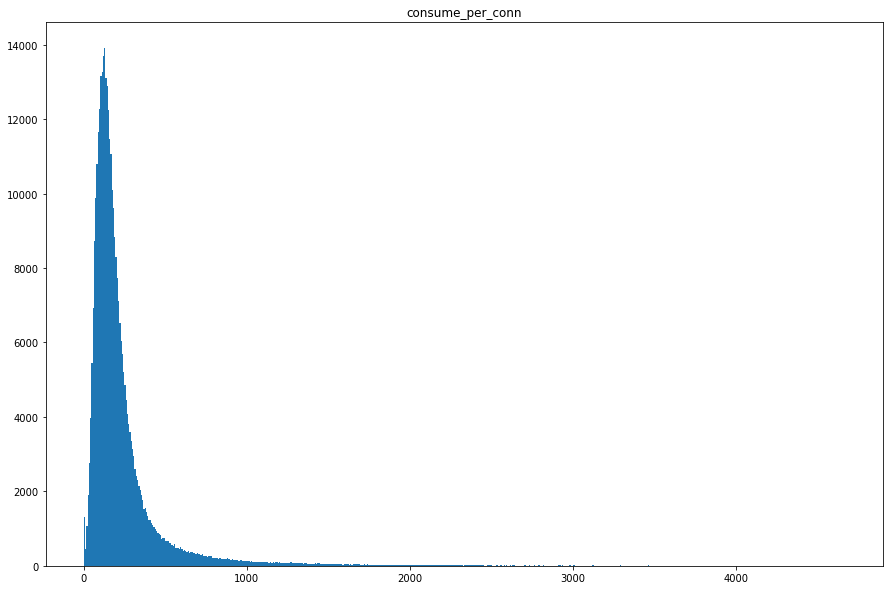


Media:  240
Mediana:  162
Moda:  0
Desviación estándar:  295.78
Sesgo:  5.47


In [ ]:
df_2020_emuestra = df_2020_e.sort_values('consume_per_conn', ascending=False).tail(360000)
df_2020_emuestra.hist(column=['consume_per_conn'], bins=600, grid=False)
plt.show()

print('\nMedia: ', int(df_2020_emuestra['consume_per_conn'].mean()))
print('Mediana: ', int(df_2020_emuestra['consume_per_conn'].median()))
print('Moda: ', int(df_2020_emuestra['consume_per_conn'].mode()))
print('Desviación estándar: ', round(df_2020_emuestra['consume_per_conn'].std(), 2))
print('Sesgo: ', round(df_2020_emuestra['consume_per_conn'].skew(), 2))

Del gráfico podemos ver un sesgo positivo, el cual se verifica con el resultado obtenido al usar `.skew()`. También, se observa que la moda es igual a 0 pero en la gráfica se ve que es unimodal, este comportamiento se debe a que no existen datos que se repitan en la muestra por lo que no hay datos con frecuencia mayor a 1 y se refleja en una moda igual a 0. La forma unimodal del gráfico se debe a la gran cantidad de datos que se encuentran en ese rango de valores pero no porque alguno de esto tenga una frecuencia mayor a la de los demás.

Por último se obtuvieron la mediana y el promedio, se puede apreciar que el valor del promedio supera al de la mediana.

# Pregunta 4

Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare el consumo por conexión de esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo inusualmente pequeño o inusualmente grande por conexión?

Creamos un nuevo dataframe que contiene las 3 ciudades con más conexiones y las 3 con menos conexiones del año 2020. Luego en otro dataframe, agregamos 3 columnas; `city` que corresponde al nombre de cada ciudad, `num_connections` que es el total de conexiones en una ciudad, valor que sirve como indicador del tamaño de la ciudad y `consume_per_conn` que es el consumo por conexión medio de una ciudad.

In [ ]:
max_cities = df_2020_e.groupby(['city']).sum().sort_values('num_connections',ascending=False).head(3)
min_cities = df_2020_e.groupby(['city']).sum().sort_values('num_connections',ascending=False).tail(3)
connect = pd.concat([max_cities, min_cities], axis = 0)

df_city = pd.DataFrame()
df_city['city'] = list(connect.index)
df_city['num_connections'] = connect['num_connections'].values

consume_means = pd.DataFrame(df_2020_e.groupby(['city'])['consume_per_conn'].mean())
consume_means['city'] = consume_means.index

list_consume = []
for city in list(connect.index):
  list_consume.append(float(consume_means.loc[consume_means['city'] == city]['consume_per_conn'].values))

df_city['consume_per_conn'] = list_consume
df_city

,city,num_connections,consume_per_conn
0,AMSTERDAM,526415.0,187.760708
1,ROTTERDAM,311305.0,192.727671
2,'S-GRAVENHAGE,278058.0,184.798168
3,LANGEDIJK,10.0,7109.333333
4,NIeuw Vennep,10.0,2640.714286
5,RHEE,10.0,1599.660000


En un gráfico de barras múltiples, graficamos y comparamos el consumo por conexión y el número de conexiones de cada ciudad. 

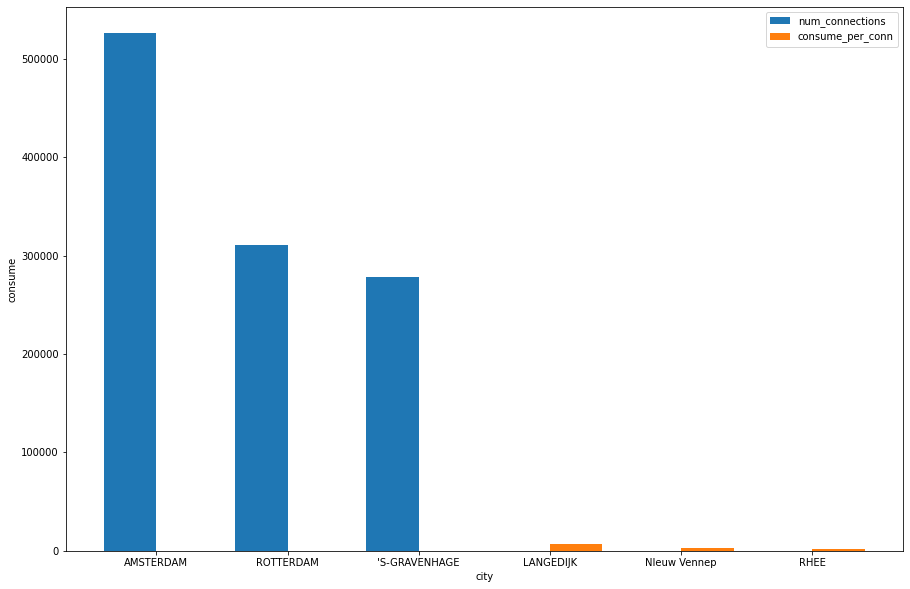

In [ ]:
X = df_city['city'].values
num_connections = df_city['num_connections'].values
consume_per_conn = df_city['consume_per_conn'].values
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, num_connections, 0.4, label = 'num_connections')
plt.bar(X_axis + 0.2, consume_per_conn, 0.4, label = 'consume_per_conn')
  
plt.xticks(X_axis, X)
plt.xlabel("city")
plt.ylabel("consume")
plt.legend()
plt.show()

Como se puede apreciar en el gráfico, las ciudades con más conexiones tienen menor consumo por conexión promedio que las ciudades con menos conexiones, por lo que podemos concluir que en ciudades de mayor tamaño hay un consumo por conexión menor, mientras que en las ciudades de menor tamaño este consumo es mayor.

Siguiendo con la segunda parte de la pregunta, modelamos a través de un histograma todos los consumos por conexión de cada ciudad.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


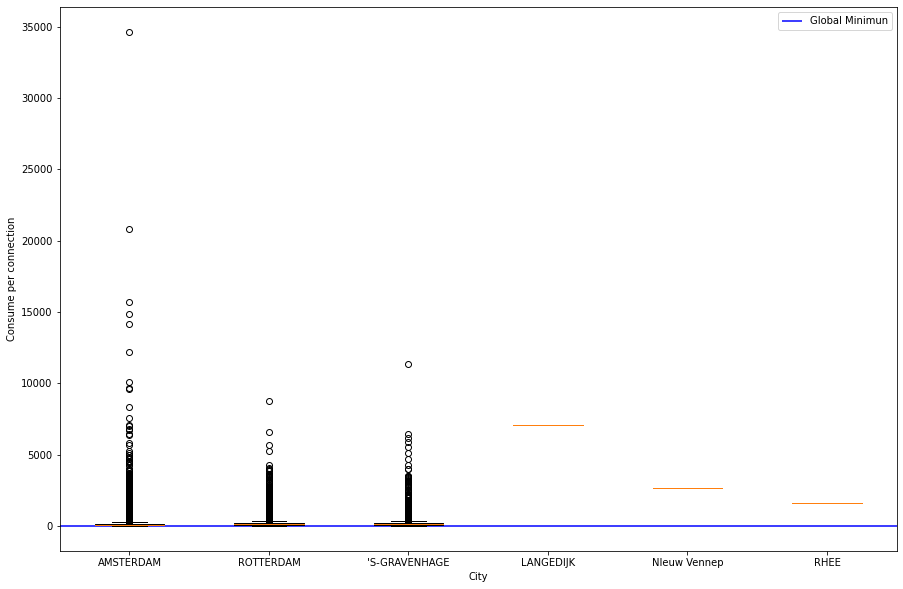

In [ ]:
cities=[]
for index,row in connect.iterrows():
  cities.append(index)

list_conections = []
for city in cities:
  list_conections.append(list(df_2020_e.loc[df_2020_e['city'] == city]['consume_per_conn'].values))

plt.boxplot(list_conections)
plt.xticks([1,2,3,4,5,6], cities)
plt.hlines(10, 0.5,6.5, color= 'blue',linestyles='solid', label='Global Minimun')
plt.xlabel("City")
plt.ylabel("Consume per connection")
plt.legend()
plt.show()

Podemos observar que en las ciudades más grandes hay muchos valores outliers que son inusualmente grandes en comparación a la mediana, mientras que en las ciudades más pequeñas solo se aprecia un dato, que corresponde a la mediana de cada ciudad. También vemos que no existen valores outliers que sean inusualmente pequeños en ninguna de las ciudades.

# Pregunta 5

¿Cuánta energía auto-generaron los hogares durante 2020? Responda construyendo y describiendo un gráfico que muestre cómo se distribuye la cantidad de energía total consumida por los hogares durante 2020, la cantidad de energía autogenerada ese año, y la fracción de la energía consumida que es autogenerada por los hogares. Comente.

Para este pregunta decidimos utilizar un gráfico de torta, aunque no sea la mejor manera de representar los datos, es la más adecuada para representar lo que se pide analizar. En el gráfico se ven dos secciones; `net_annual_cons` que corresponde a la energía consumida que es distribuida por las compañías y `self_production` que es la energía autoproducida por los hogares, la suma de estos valores corresponde al consumo anual en 2020.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


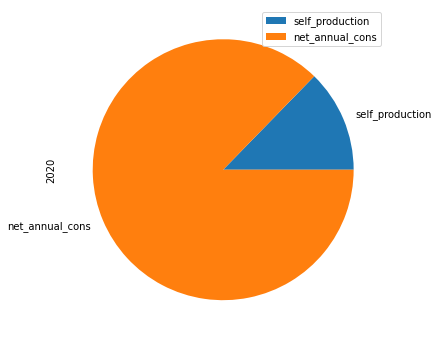

In [ ]:
df_2020_e.groupby(['year'])['self_production', 'net_annual_cons'].sum().transpose().plot.pie(subplots=True, figsize=(11, 6))
plt.show()

En el gráfico de torta podemos ver la fracción de la energía consumida que corresponde a energía autoproducida, además podemos ver que no representa una gran parte de lo que se consumió en 2020.

# Pregunta 6

Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare la distribución de la cantidad de energía auto-generada en esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo auto-generado inusualmente pequeño o inusualmente grande?

Creamos un nuevo dataframe que contiene las 3 ciudades con más conexiones y las 3 con menos conexiones del año 2020. Luego en otro dataframe, agregamos 3 columnas; `city` que corresponde al nombre de cada ciudad, `num_connections` que es el total de conexiones en una ciudad, valor que sirve como indicador del tamaño de la ciudad y `self_production` que es la energía autoproducida total de la ciudad.

In [ ]:
max_cities = df_2020_e.groupby(['city']).sum().sort_values('num_connections',ascending=False).head(3)
min_cities = df_2020_e.groupby(['city']).sum().sort_values('num_connections',ascending=False).tail(3)
connect = pd.concat([max_cities, min_cities], axis = 0)[['num_connections','self_production']]
connect

,num_connections,self_production
city,,
AMSTERDAM,526415.0,1.451577e+06
ROTTERDAM,311305.0,1.058607e+06
'S-GRAVENHAGE,278058.0,1.602601e+06
LANGEDIJK,10.0,0.000000e+00
NIeuw Vennep,10.0,0.000000e+00
RHEE,10.0,1.599660e+03


En un gráfico de barras múltiples, graficamos y comparamos la energia autoproducida y el número de conexiones de cada ciudad. 

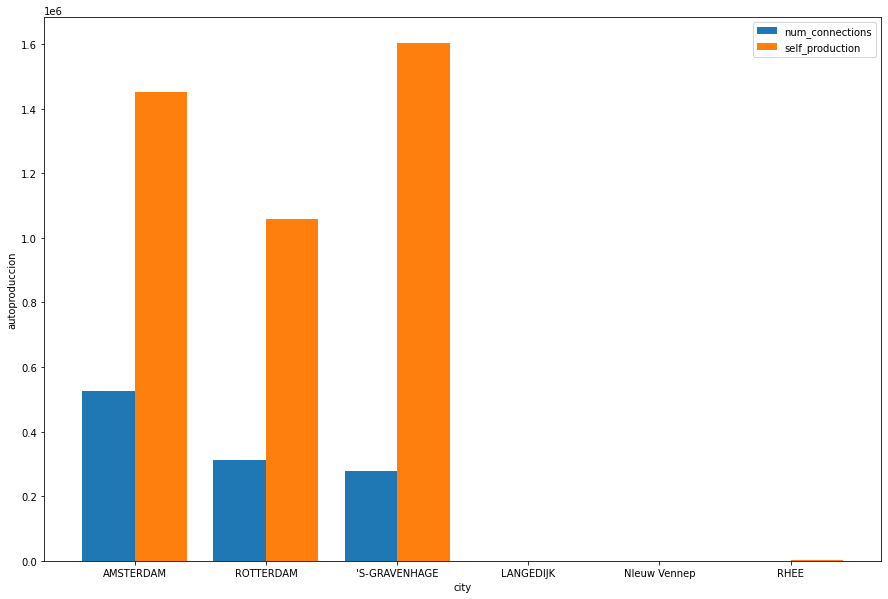

In [ ]:
cities=[]
for index,row in connect.iterrows():
  cities.append(index)

X = cities
num_connections = connect['num_connections'].values
consume_per_conn = connect['self_production'].values

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, num_connections, 0.4, label = 'num_connections')
plt.bar(X_axis + 0.2, consume_per_conn, 0.4, label = 'self_production')

plt.xticks(X_axis, X)
plt.xlabel("city")
plt.ylabel("autoproduccion")
plt.legend()
plt.show()

Como se puede apreciar en el gráfico, las ciudades con más conexiones tienen mayor energia autoproducida que las ciudades con menos conexiones, por lo que podemos concluir que en ciudades de mayor tamaño autogeneran mas energia que las pequeñas.

Siguiendo con la segunda parte de la pregunta, modelamos a través de un boxplot la energía autoproducida en cada ciudad.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


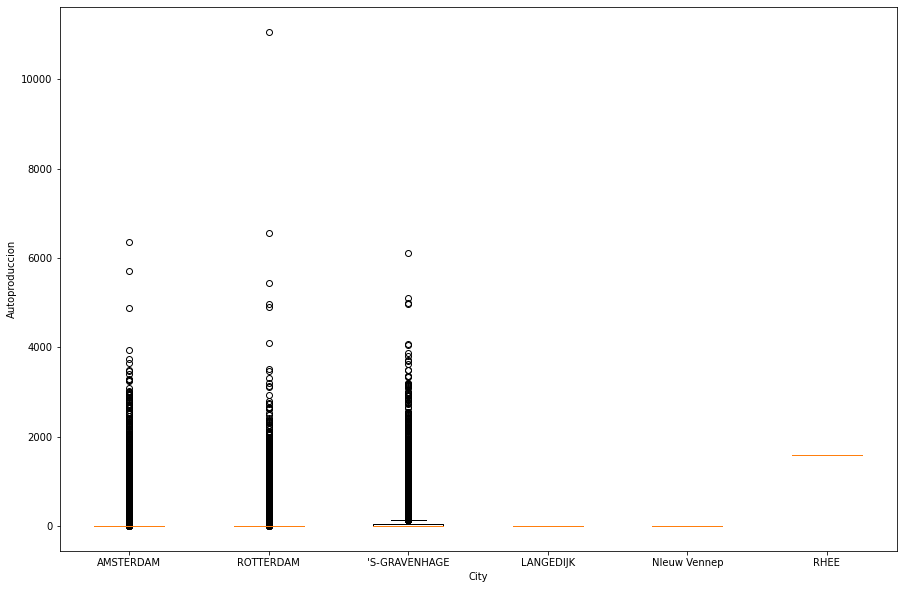

In [ ]:
list_conections = []
for city in cities:
  list_conections.append(list(df_2020_e.loc[df_2020_e['city']==city]['self_production'].values))

plt.boxplot(list_conections)
plt.xticks([1,2,3,4,5,6],cities)
plt.xlabel("City")
plt.ylabel("Autoproduccion")
plt.show()

Podemos observar que en las ciudades más grandes hay muchos valores outliers que son inusualmente grandes en comparación a la mediana, mientras que en las ciudades más pequeñas solo se aprecia un dato, que corresponde a la mediana de cada ciudad. También vemos que no existen valores outliers que sean inusualmente pequeños en ninguna de las ciudades.

# Pregunta 7

¿Existe una relación entre el consumo anual y la cantidad de conexiones de una ciudad? ¿Entre el consumo anual y la cantidad de energía auto-generada en la ciudad?

Lo primero que hicimos fue agrupar los datos de electricidad del año 2020 por la ciudad en un nuevo dataframe, e hicimos un gráfico de puntos para ver la relación entre los datos.

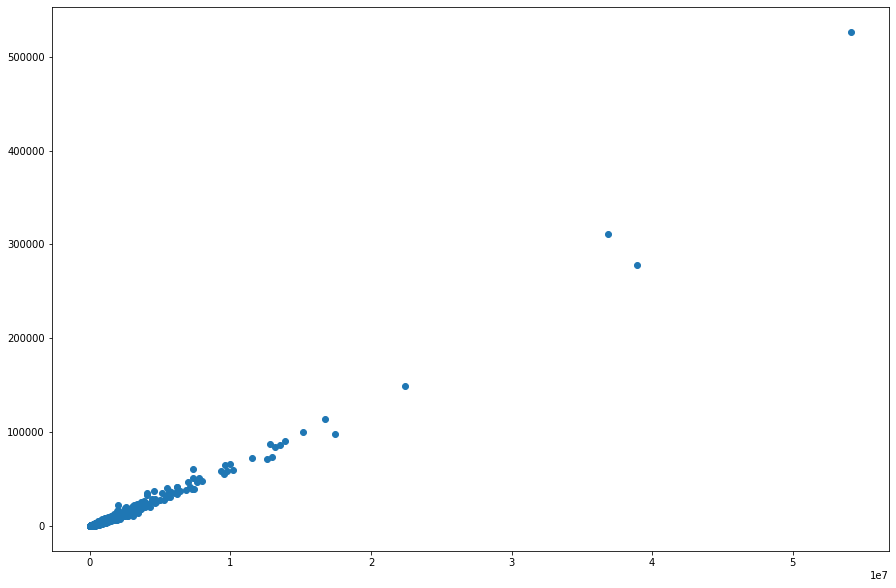

In [ ]:
df_ams = df_2020_e.groupby(['city','year']).sum()
fig, ax = plt.subplots()
ax.scatter(df_ams['annual_consume'].values, df_ams['num_connections'].values)
plt.show()

En este gráfico se puede observar que la relación entre el consumo y el numero de conexiones va en aumento.

Con el dataframe hecho anteriormente, hicimos otro gráfico de puntos para ver la relación entre el consumo anual y la autoproducción.

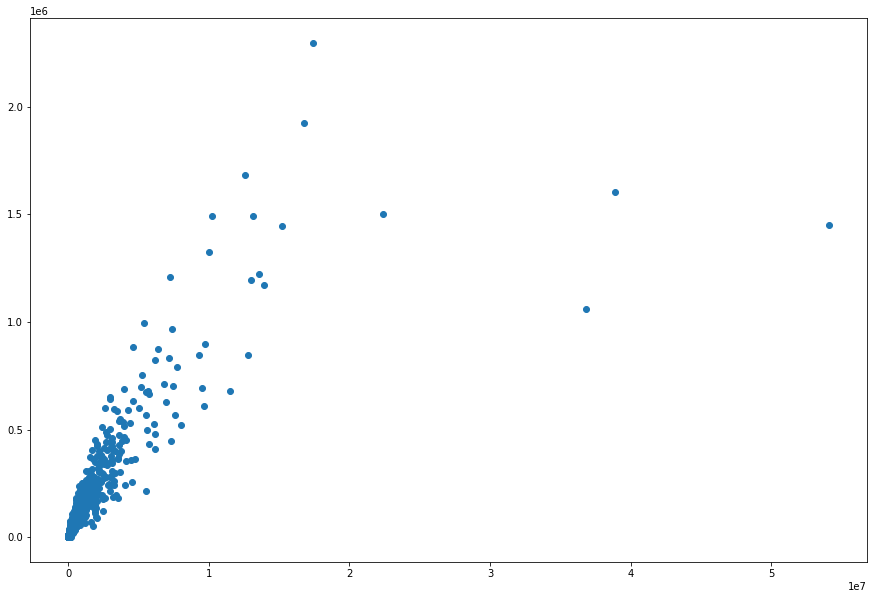

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_ams['annual_consume'].values, df_ams['self_production'].values)
plt.show()

En este gráfico se puede observar una relación que va en aumento constante y parece tener una tendencia logarítmica.

# Pregunta 8

¿Está aumentado el consumo de gas en el país? ¿El consumo de electricidad? ¿Está aumentando o disminuyendo más un tipo de consumo que otro? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones. Comente lo que observa.

Para responder esta pregunta consideramos, por cada año, las 10 ciudades con mayor cantidad de conexiones, las cuales ocupamos para ver el consumo anual de cada año representado en el gráfico a continuación. Junto a este calculamos la desviación estándar y el promedio del consumo anual.

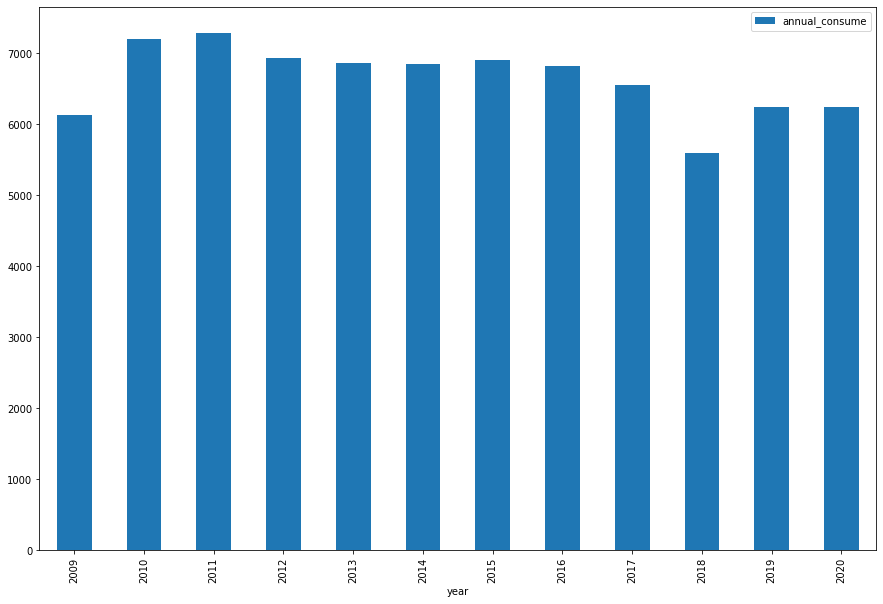


Desviación estándar:  498.99
Media:  663.79


In [ ]:
df_g8=pd.DataFrame()
for year in df_gas['year'].unique():
  df_g8=pd.concat([df_gas.loc[df_gas['year'] == year].sort_values('num_connections', ascending=False).head(10), df_g8], axis = 0)
df_g8.groupby(['year']).sum()['annual_consume'].plot(kind='bar',legend='Reverse')
plt.show()
print('\nDesviación estándar: ', round(df_g8['annual_consume'].std(), 2))
print('Media: ', round(df_g8['annual_consume'].mean(), 2))

Como se puede observar en el gráfico, la cantidad de energía consumida a través de los años aumentó durante un periodo de tiempo para luego bajar y volver a un valor parecido al inicial.

Usamos la misma estrategia para la electricidad.

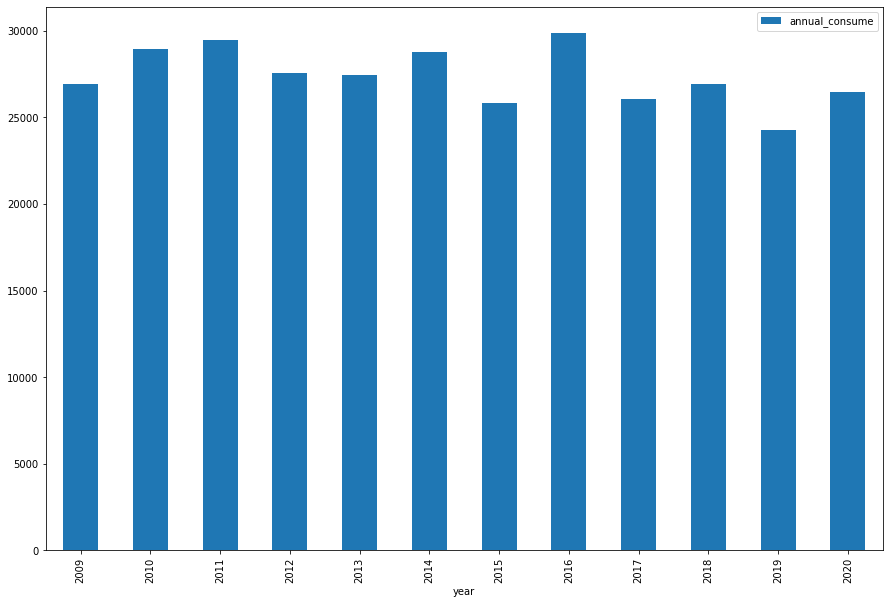


Desviación estándar:  839.69
Media:  2739.0


In [ ]:
df_e8=pd.DataFrame()
for year in df_electricity['year'].unique():
  df_e8=pd.concat([df_electricity.loc[df_electricity['year'] == year].sort_values('num_connections', ascending=False).head(10),df_e8], axis = 0)
df_e8.groupby(['year']).sum()['annual_consume'].plot(kind='bar',legend='Reverse')
plt.show()
print('\nDesviación estándar: ', round(df_e8['annual_consume'].std(), 2))
print('Media: ', round(df_e8['annual_consume'].mean(), 2))

En este gráfico se puede ver que el consumo de electricidad es más variable comparado con el del gas. Sin embargo, en el último año vemos un comportamiento similar al del gas, pues tiene un valor muy similar al inicial.

#Pregunta 9

¿Está aumentado la cantidad de energía auto-generada en el país? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones. Comente lo que observa.

Para responder esta pregunta consideramos, por cada año, las 10 ciudades con mayor cantidad de conexiones eléctricas, las cuales ocupamos para ver el consumo anual de cada año representado en el gráfico a continuación. Junto a este calculamos la desviación estándar y el promedio de la autoproducción.

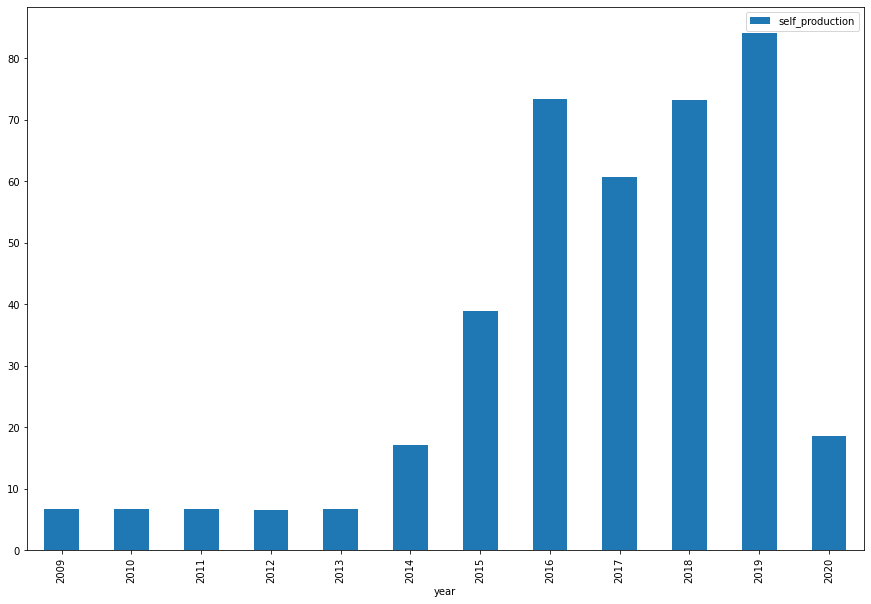


Desviación estándar:  9.06
Media:  3.33


In [ ]:
df_e9=pd.DataFrame()
for year in df_electricity['year'].unique():
  df_e9=pd.concat([df_electricity.loc[df_electricity['year'] == year].sort_values('num_connections', ascending=False).head(10),df_e9], axis = 0)
df_e9.groupby(['year']).sum()['self_production'].plot(kind='bar',legend='Reverse')
plt.show()

print('\nDesviación estándar: ', round(df_e9['self_production'].std(), 2))
print('Media: ', round(df_e9['self_production'].mean(), 2))

Aquí se puede ver un aumento considerable en la autoproducción entre los años 2014 y 2019 pero sufrió una caída estrepitosa en 2020.

#Pregunta 10

Proponga y desarrolle un análisis libre que no haya sido cubierto y que esté relacionada al objetivo del cliente (saber en qué empresas o ciudades o tipos de conexion invertir). Resuma también las principales conclusiones del estudio.

De los tipos de conexiones que hay principalmente en el año 2020, ¿Cuál de estos presenta un mayor consumo? Presente medidas de tendencia central



Creamos un gráfico que se basa en la comparación de cantidades entre los `type_of_connection`, por la sumatoria de los `num_connections` en cada tipo de conexión.

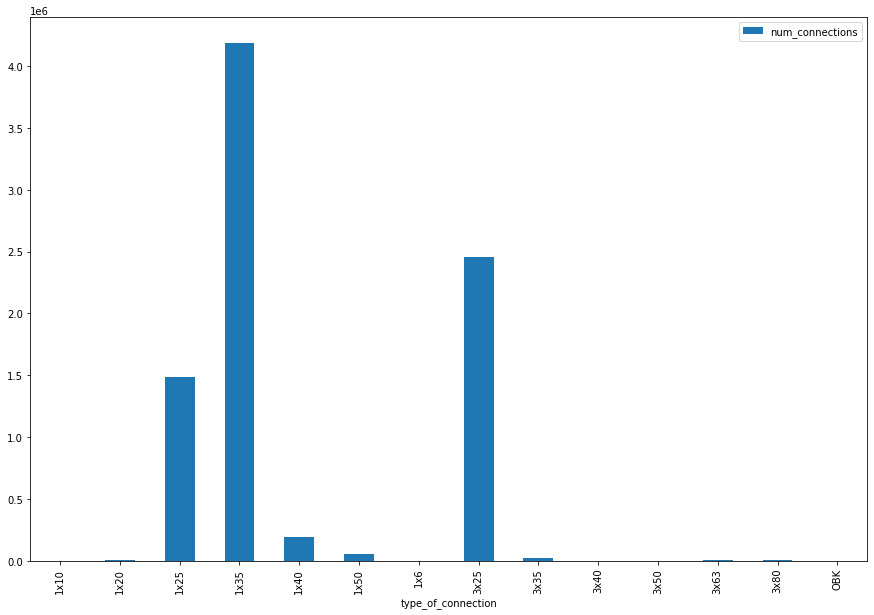

In [ ]:
df_2020_e.groupby('type_of_connection')['num_connections'].sum().plot(kind='bar',legend='Reverse')
plt.show()

Al analizar el gráfico, observamos que la mayoría (moda) de tipos de conexión pertenece a la conexión 1x35, dándonos a entender que la población opta y accede a las conexiones de tipo 1x35.
Después creamos otro gráfico en donde comparamos las cantidades de `annual_consume` según cada `type_of_connection`.

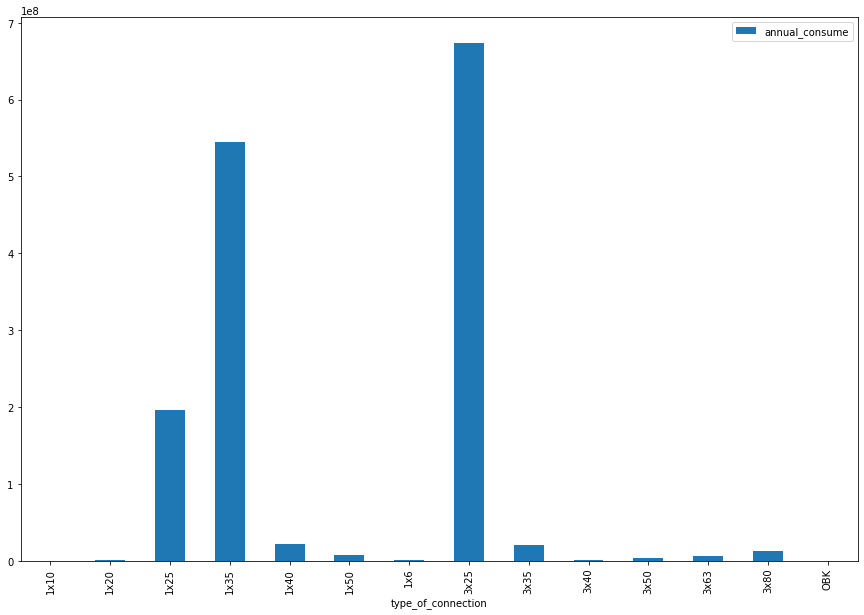

In [ ]:
df_2020_e.groupby('type_of_connection')['annual_consume'].sum().plot(kind='bar',legend='Reverse')
plt.show()

Al analizar este gráfico, observamos como la mayoría (moda) de la energía consumida pertenece al tipo 3x25, nos da a conocer que es el tipo de conexión más demandanda aunque no sea el tipo de conexión con más número de conexiones según el primer gráfico.

Concluyendo con todos nuestros análisis, podemos decir que las ciudades más demandadas en energía eléctrica y gas son Amsterdam, 'S-Gravenhage y Rotterdam, también podemos mencionar que tienen el mayor número de conexiones entre otras ciudades, pero sus conexiones tienen los consumos más bajos, y contienen los mayores números de energía auto-generada del país. Las empresas más competidoras son Liander y Enexis. Con los pasos de los años, el consumo de energía eléctrica y de gas han variado, pero tienden a mantenerse constantes, y la energía auto-generada aumenta considerablemente pero en el último tiempo sufrió una caída.

Nuestro consejo es que invierta en la empresa Liander, ya que realiza servicios en la ciudad Amterdam, aunque esta ciudad tiene energia auto-generada, aun no es predominante, y realice inversiones en el tipo de conexión 3x25.